In [5]:
import sys
sys.path.append('..')
from tempocr.digit_recognition import get_bg_colors, get_fg_colors, get_digits
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from PIL import Image

test_image = '../test_images/2018-02-09-1349_fixed.png'

In [7]:
from tempocr.digit_recognition import ImageCoordinates

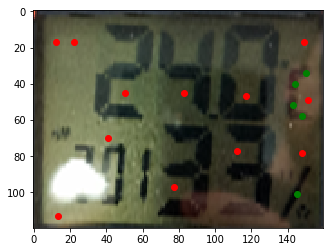

In [30]:
bg_color_coords = [
    ImageCoordinates(0.075, 0.14375),
    ImageCoordinates(0.1390625, 0.1416666667),
    #ImageCoordinates(0.6765625, 0.2),
    ImageCoordinates(0.3109375, 0.375),
    ImageCoordinates(0.51875, 0.3770833333),
    ImageCoordinates(0.7328125, 0.3895833333),
    ImageCoordinates(0.9296875, 0.1416666667),
    ImageCoordinates(0.9453125, 0.4041666667),
    ImageCoordinates(0.2578125, 0.5833333333),
    ImageCoordinates(0.080625, 0.9458333333),
    ImageCoordinates(0.4796875, 0.8104166667),
    ImageCoordinates(0.6984375, 0.64375),
    ImageCoordinates(0.9234375, 0.6479166667)
]

fg_color_coords = [
    ImageCoordinates(0.9078125, 0.8416666667),
    ImageCoordinates(0.940625, 0.2833333333),
    ImageCoordinates(0.903125, 0.3333333333),
    ImageCoordinates(0.8953125, 0.4375),
    ImageCoordinates(0.928125, 0.4833333333),
    #ImageCoordinates(0.6265625, 0.4958333333)
]

im = Image.open(test_image)
plt.imshow(im)

xpts = []
ypts = []

for coords in bg_color_coords:
    xpts.append(coords.get_pixel_x(im))
    ypts.append(coords.get_pixel_y(im))

plt.plot(xpts, ypts, 'ro')

xpts = []
ypts = []

for coords in fg_color_coords:
    xpts.append(coords.get_pixel_x(im))
    ypts.append(coords.get_pixel_y(im))
    
plt.plot(xpts, ypts, 'go')

im.close()

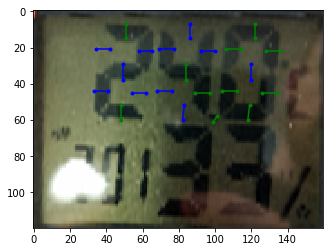

In [2]:
im = Image.open(test_image)
plt.imshow(im)

digits = get_digits(im)

bg_colors = get_bg_colors(im)
fg_colors = get_fg_colors(im)

for digit in digits:
    for stripe in digit.segment_stripes:
        line_color = 'g' if stripe.is_on(bg_colors, fg_colors) else 'b'
        xpts = [
            stripe.start[0], stripe.end[0]
        ]
        ypts = [
            stripe.start[1], stripe.end[1]
        ]
        plt.plot(xpts, ypts, '.{}-'.format(line_color))
    
plt.show()

im.close()